In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv ("weatherHistory.csv")
data.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


In [35]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['day'] = data['Formatted Date'].dt.dayofyear
data.head(2)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,day
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,90
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,90


In [36]:
data['MY_Date'] = data['Formatted Date'].map(lambda date : 100*(100*date.year + date.month) + date.day)
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,day,MY_Date
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,90,20060331
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,90,20060331
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,91,20060401
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,91,20060401
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,91,20060401


In [37]:
data01 = data.groupby(['MY_Date' , 'day'])['Temperature (C)'].mean().reset_index()
data01.head()

,MY_Date,day,Temperature (C)
0,20051231,365,0.577778
1,20060101,1,4.075000
2,20060102,2,5.263194
3,20060103,3,2.340509
4,20060104,4,2.251852


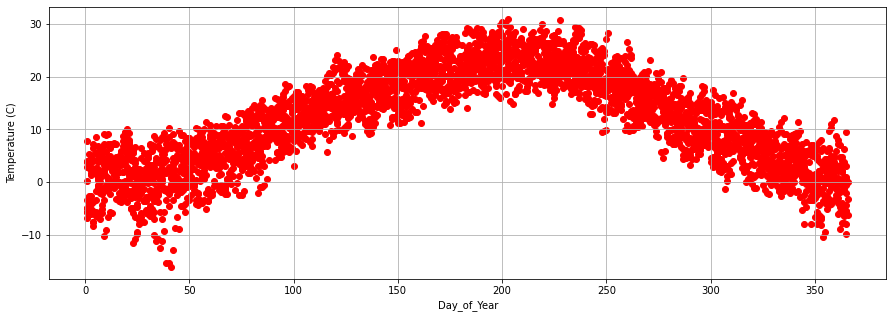

In [38]:
plt.figure(figsize=(15,5)) 
plt.scatter(data01['day'], data01['Temperature (C)'], marker='o' , c = 'red')
plt.grid()

plt.ylabel('Temperature (C)')
plt.xlabel('Day_of_Year')

plt.savefig('w.jpeg')

In [39]:
X_train = np.array(data01['day'])
Y_train = np.array(data01['Temperature (C)'])
X_train = X_train.reshape(-1 ,1)
Y_train = Y_train.reshape(-1 ,1)

In [48]:
class perceptron:
    def __init__ (self):
        pass

    def fit(self, X, Y , epochs):
        self.X = X
        self.Y = Y

        lr = 0.0001
        self.w = np.random.rand(2, 1)
        self.b = np.random.rand(1, 1)
        self.Error = []
        for i in range(epochs):
            for i in range (self.X.shape):
                y_pred = np.matmul(self.X[i], self.w) + self.b
                e = self.Y[i] - y_pred
                self.w += self.X[i] * lr * e
                self.b += lr * e

                Y_pred = np.matmul(self.X, self.w) + self.b
                error = np.mean(np.abs(self.Y - Y_pred))
                self.Error.append(error)
            
        return self.w, self.b, 

    def predict (self, X):
        y_pred=np.matmul(X, self.w) + self.b
        return  y_pred

    def evaluate(self, X_test, Y_test):
        Y_pred = np.matmul(X_test, self.w) + self.b
        error = np.mean(np.abs(Y_test - Y_pred))
        print('The error is:', error )
        return error

        

In [47]:
print(X_train)

[[365]
 [  1]
 [  2]
 ...
 [364]
 [365]
 [366]]


In [49]:
model = perceptron()
model.fit(X_train, Y_train , 3)
model.predict(X_train)
model.evaluate(X_train, Y_train)


TypeError: 'tuple' object cannot be interpreted as an integer